<a href="https://colab.research.google.com/github/lacakp/Project-Image-Classification/blob/main/Proj_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction


Hi I'm lacakp : )
github: https://github.com/lacakp

# Prepare Colab

In [ ]:
# https://www.analyticsvidhya.com/blog/2021/06/how-to-load-kaggle-datasets-directly-into-google-colab/
# https://www.kaggle.com/moltean/fruits
# https://www.kaggle.com/sshikamaru/fruit-recognition


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# 1. Install the Kaggle library
! pip install kaggle

In [3]:
# 2. Make a directory named “.kaggle”
!mkdir kaggle

In [8]:
# 3. Copy the “kaggle.json” into this new directory # 4. Allocate the required permission for this file.
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/kaggle.json
# ! chmod 600 ~/.kaggle/kaggle.json

In [9]:
# Downloading Competitions dataset:
! kaggle datasets download -d moltean/fruits/fruits-360_dataset/Training/
# ! kaggle datasets download -d moltean/fruits/fruits-360_dataset/Test


100% 1.28G/1.28G [00:08<00:00, 151MB/s]
100% 1.28G/1.28G [00:08<00:00, 163MB/s]


In [10]:
# Create a directory named train,
! mkdir train
# unzip train data there,
! unzip fruits.zip -d train
! ls

Streaming output truncated to the last 5000 lines.
  inflating: train/fruits-360_dataset/fruits-360/Training/Tomato 3/112_100.jpg  
  inflating: train/fruits-360_dataset/fruits-360/Training/Tomato 3/113_100.jpg  
  inflating: train/fruits-360_dataset/fruits-360/Training/Tomato 3/114_100.jpg  
  inflating: train/fruits-360_dataset/fruits-360/Training/Tomato 3/115_100.jpg  
  inflating: train/fruits-360_dataset/fruits-360/Training/Tomato 3/116_100.jpg  
  inflating: train/fruits-360_dataset/fruits-360/Training/Tomato 3/117_100.jpg  
  inflating: train/fruits-360_dataset/fruits-360/Training/Tomato 3/119_100.jpg  
  inflating: train/fruits-360_dataset/fruits-360/Training/Tomato 3/120_100.jpg  
  inflating: train/fruits-360_dataset/fruits-360/Training/Tomato 3/121_100.jpg  
  inflating: train/fruits-360_dataset/fruits-360/Training/Tomato 3/122_100.jpg  
  inflating: train/fruits-360_dataset/fruits-360/Training/Tomato 3/123_100.jpg  
  inflating: train/fruits-360_dataset/fruits-360/Training/

#Pipeline
1. get data
2. extract feature
3. train model
4. test model
5. deploy model

## 1. get data

In [ ]:
# !pip install keras
# !pip install tensorflow

In [11]:
import os
import numpy as np
import pandas as pd
import cv2 as cv 
from google.colab.patches import cv2_imshow
from skimage import io
import random

In [17]:
!ls 'train/fruits-360_dataset/fruits-360/Training'
train_path = 'train/fruits-360_dataset/fruits-360/Training'

'Apple Braeburn'       'Grape Blue'	     'Pear Monster'
'Apple Crimson Snow'   'Grapefruit Pink'     'Pear Red'
'Apple Golden 1'       'Grapefruit White'    'Pear Stone'
'Apple Golden 2'       'Grape Pink'	     'Pear Williams'
'Apple Golden 3'       'Grape White'	      Pepino
'Apple Granny Smith'   'Grape White 2'	     'Pepper Green'
'Apple Pink Lady'      'Grape White 3'	     'Pepper Orange'
'Apple Red 1'	       'Grape White 4'	     'Pepper Red'
'Apple Red 2'	        Guava		     'Pepper Yellow'
'Apple Red 3'	        Hazelnut	      Physalis
'Apple Red Delicious'   Huckleberry	     'Physalis with Husk'
'Apple Red Yellow 1'    Kaki		      Pineapple
'Apple Red Yellow 2'    Kiwi		     'Pineapple Mini'
 Apricot	        Kohlrabi	     'Pitahaya Red'
 Avocado	        Kumquats	      Plum
'Avocado ripe'	        Lemon		     'Plum 2'
 Banana		       'Lemon Meyer'	     'Plum 3'
'Banana Lady Finger'    Limes		      Pomegranate
'Banana Red'	        Lychee		     'Pomelo Sweetie'
 Beetroot	        Mand

In [13]:
# ฟังก์ชันสำหรับโหลดภาพเข้ามา
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv.imread(os.path.join(folder,filename))
        if img is not None:
            images.append(img)
    return images

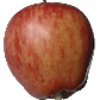

In [14]:
# https://colab.research.google.com/github/xn2333/OpenCV/blob/master/Image_Processing_in_Python_Final.ipynb#scrollTo=6dy-iP-VTibt
""" ทดสอบ """
apple_train = 'train/fruits-360_dataset/fruits-360/Training/Apple Red 1/'
image = cv.imread(apple_train+'0_100.jpg') 
cv2_imshow(image) # โชว์ภาพ

In [15]:

apple_train = 'train/fruits-360_dataset/fruits-360/Training/Apple Red 1/' # Apple
banana_train = 'train/fruits-360_dataset/fruits-360/Training/Banana/'     # banana
tomato_train = 'train/fruits-360_dataset/fruits-360/Training/Tomato 1/'   # tomato

apple_img = load_images_from_folder(apple_train)  # โหลดภาพ แอปเปิ้ลมา
banana_img = load_images_from_folder(banana_train)  # โหลดภาพ กล้วยมา
tomato_img = load_images_from_folder(tomato_train)  # โหลดภาพ กล้วยมา

print("ภาพกล้วยมีอยู่ " + str(len(banana_img)) + " ภาพ")
print("ภาพแอปเปิ้ลมีอยู่ " + str(len(apple_img)) + " ภาพ")
print("ภาพแอปเปิ้ลมีอยู่ " + str(len(tomato_img)) + " ภาพ")

ภาพกล้วยมีอยู่ 490 ภาพ
ภาพแอปเปิ้ลมีอยู่ 492 ภาพ
ภาพแอปเปิ้ลมีอยู่ 738 ภาพ


In [ ]:
# สุ่มมาสัก 30 ภาพ
for i in range(30):   
  ran = random.randint(1,489)   # สุ่ม
  final_frame = cv.hconcat((apple_img[ran], tomato_img[ran], banana_img[ran])) # ต่อภาพเพื่อแสดง โดยสุ่มภาพมา
  cv2_imshow(final_frame) # โชว์ภาพ

## 2. extract feature

In [21]:
def extractimagefeat(fruit_img):
  # for i in range(len(fruit_img)): # วนรอบใน ลิสต์ภาพผลไม้ ร้อยกว่าภาพ

  for i in range(30): # วนรอบใน ลิสต์ภาพผลไม้ 30 ภาพ
    ran = random.randint(1,400)   # ทำการสุ่มเลข ตามจำนวนครั้งของ range
    imglist.append(fruit_img[ran]) # สร้าง imglist ที่ได้จากการสุ่ม

  i = 1 # index
  for img in imglist[0:30]: # ทำการวนซ้ำ range 0 : 30
    #extract image features from each images and save to files
    try:
      print(i)
      # create image path
      savepath = foldername + '/' + str(i)+'.p' # 
      a = cv.image(img)
      a.getresnet50()
      a.save(savepath)
      i = i + 1
    except:
      pass
  return 'complete'

In [25]:
# สุ่มมาสัก 30 ภาพ
imglist = []
for i in range(30):   
  ran = random.randint(1,489)   # สุ่ม
  imglist.append(apple_img[ran]) # ต่อภาพเพื่อแสดง โดยสุ่มภาพมา
print(len(imglist))

30


In [ ]:
fruit_img = apple_img[ran]

In [24]:
extractimagefeat(imglist)

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


'complete'

## 3. train model


## 4. test model


## 5. deploy model